In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [50]:
deg = 10
x, w = np.polynomial.legendre.leggauss(deg)

In [51]:
for i in range(deg):
    print(x[i],w[i])

-0.9739065285171717 0.06667134430868807
-0.8650633666889845 0.14945134915058036
-0.6794095682990244 0.219086362515982
-0.4333953941292472 0.2692667193099965
-0.14887433898163122 0.295524224714753
0.14887433898163122 0.295524224714753
0.4333953941292472 0.2692667193099965
0.6794095682990244 0.219086362515982
0.8650633666889845 0.14945134915058036
0.9739065285171717 0.06667134430868807


In [24]:
a = 0
b = 0.5*np.pi

In [25]:
f = lambda x: np.sin(x)

In [26]:
t = 0.5*( (b-a)*x + a + b )

In [27]:
Integral = 0.5*(b-a)*np.sum(w*f(t))

In [28]:
print(Integral)

0.9999999999999991


In [21]:
import sympy as sym

In [34]:
x = sym.Symbol('x',Real=True)
F = sym.sin(3*x)*sym.exp(-0.5*x)
print(F)

exp(-0.5*x)*sin(3*x)


In [35]:
f = sym.lambdify( [x], F, 'numpy' )

In [37]:
x = np.linspace(0,10,100)
y = f(x)

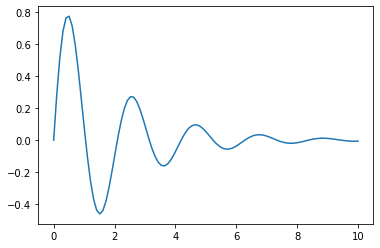

In [38]:
plt.plot(x,y)

In [39]:
xf = sym.Symbol('xf',Real=True)
hf = sym.Symbol('hf',Real=True)
F2 = (xf)*(xf-hf)*(xf-2*hf)*(xf-3*hf)
print(F2)

xf*(-3*hf + xf)*(-2*hf + xf)*(-hf + xf)


In [40]:
I = sym.integrate(F2, (xf, 0, 3*hf))

In [41]:
print(I/24)

-3*hf**5/80


In [42]:
# Generar los polinomios de Legendre

def CreatePoly(n):
    
    x = sym.Symbol('x',Real=True)
    y = sym.Symbol('y',Real=True)
    
    y = (x**2-1)**n
    
    poly = sym.diff( y,x,n  )/( 2**n * np.math.factorial(n))
    
    return poly

In [44]:
print(CreatePoly(3))

x*(5*x**2 - 3)/2


In [45]:
Legendre = []

n = 10

for i in range(n):
    
    Legendre.append(CreatePoly(i))

In [47]:
for i in Legendre:
    print(i)
    x = sym.Symbol('x',Real=True)
    print(sym.diff(i,x,1))

1
0
x
1
(3*x**2 - 1)/2
3*x
x*(5*x**2 - 3)/2
15*x**2/2 - 3/2
(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
10*x**3 + 15*x*(x**2 - 1)/2
x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
x**4 + 5*x**2*(x**2 - 1) + x*(112*x**3 + 140*x*(x**2 - 1))/8 + 15*(x**2 - 1)**2/8
(16*x**6 + 120*x**4*(x**2 - 1) + 90*x**2*(x**2 - 1)**2 + 5*(x**2 - 1)**3)/16
21*x**5 + 105*x**3*(x**2 - 1)/2 + 105*x*(x**2 - 1)**2/8
x*(16*x**6 + 168*x**4*(x**2 - 1) + 210*x**2*(x**2 - 1)**2 + 35*(x**2 - 1)**3)/16
x**6 + 21*x**4*(x**2 - 1)/2 + 105*x**2*(x**2 - 1)**2/8 + x*(432*x**5 + 1512*x**3*(x**2 - 1) + 630*x*(x**2 - 1)**2)/16 + 35*(x**2 - 1)**3/16
(128*x**8 + 1792*x**6*(x**2 - 1) + 3360*x**4*(x**2 - 1)**2 + 1120*x**2*(x**2 - 1)**3 + 35*(x**2 - 1)**4)/128
36*x**7 + 189*x**5*(x**2 - 1) + 315*x**3*(x**2 - 1)**2/2 + 315*x*(x**2 - 1)**3/16
x*(128*x**8 + 2304*x**6*(x**2 - 1) + 6048*x**4*(x**2 - 1)**2 + 3360*x**2*(x**2 - 1)**3 + 315*(x**2 - 1)**4)/128
x**8 + 18*x**6*(x**2 - 1) + 189*x**4*(x**2 - 1)**2/4 + 105*x**2*(x**2 